# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

# Splitting data into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting Decision Tree to the Training set

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Predicting test result

In [12]:
y_pred = classifier.predict(X_test)

# Creating Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[42, 10],
       [ 6, 22]])

# Visualising training data

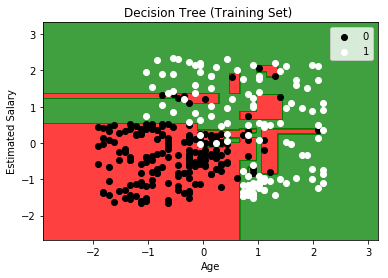

In [15]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train , y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                       np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')) )

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('black','white'))(i),label=j)
    
plt.title('Decision Tree (Training Set) ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising test result

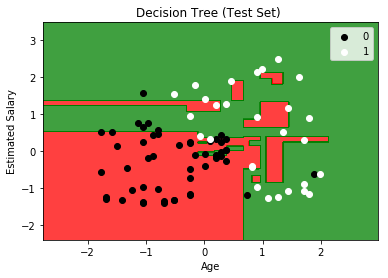

In [18]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop= X_set[:,0].max()+1,step=0.01),
                       np.arange(start=X_set[:,1].min()-1, stop= X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')) )

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('black','white'))(i),label=j)
    
plt.title('Decision Tree (Test Set) ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()